# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.7745642445957639, performing 48.9 it/sec
Step 100: Loss = 3.5205531783951720, performing 130.7 it/sec
Step 200: Loss = 0.8423392930217002, performing 130.7 it/sec
Step 300: Loss = 0.4005104111388729, performing 86.4 it/sec
Step 400: Loss = 0.3245634628273238, performing 86.8 it/sec
Step 500: Loss = 0.2408731868545242, performing 88.4 it/sec
Step 600: Loss = 0.1572624601731181, performing 89.5 it/sec
Step 700: Loss = 0.0735858594659561, performing 84.9 it/sec
Step 800: Loss = 0.0097922259972668, performing 85.5 it/sec
No improvement since Step 799, early stopping.
[Best]  Step 798: Loss = 0.0096498878483678
[Final] Step 848: Loss = 0.0109015201055188

predicted end states
------------------------------------
         5th       Mean      95th
LF2F-1  3.24e-04  3.24e-04  3.24e-04
LF2F-2  9.95e-12  1.00e-11  1.01e-11
LF2F-3  3.61e-0

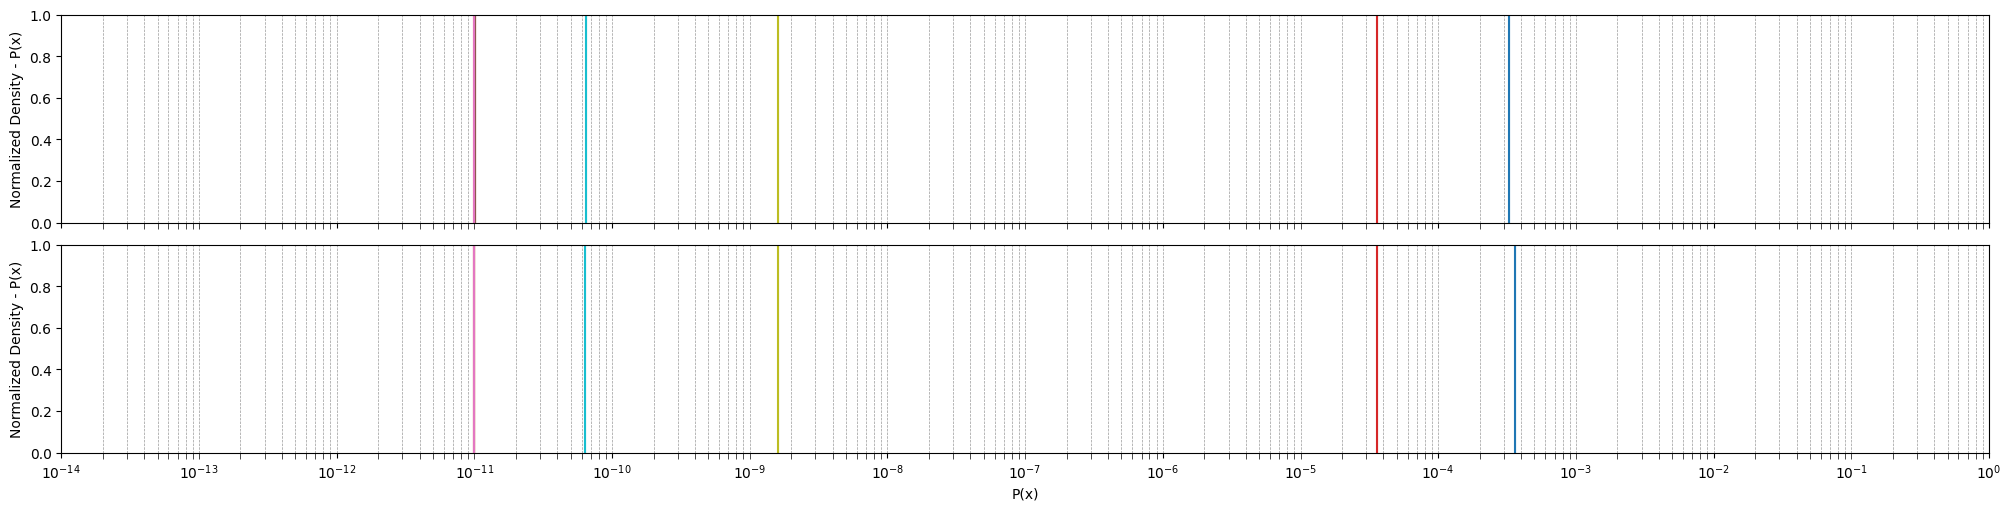

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.6e-4,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF2F', 'FSIG', 'FROD', 'BPHR', 'DHRS', 'DHRL|DHRS', 'DHRL|~DHRS'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LF2F-1': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 0],
        'probability': 3.6e-4,
    },
    'LF2F-2': {
        'sequence': [1, 0, 0, 0, np.nan, np.nan, 1],
        'probability': 1e-11,
    },
    'LF2F-3': {
        'sequence': [1, 0, 0, 1, 0, 0, np.nan],
        'probability': 3.6e-5,  # frequency unknown
    },
    'LF2F-4': {
        'sequence': [1, 0, 0, 1, 0, 1, np.nan],
        'probability': 1.0e-11,
    },
    'LF2F-5': {
        'sequence': [1, 0, 0, 1, 1, np.nan, np.nan],
        'probability': 1.0e-11,
    },
    'LF2F-6': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.6e-9,
    },
    'LF2F-7': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 6.4e-11,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)